# 30 Oct 2023 - Notes: Deconstructing Waves

While we observe waves in many places, it's the case that we don't often have the luxury of constructing them as we want. In fact, much of the science we do relies on measurements of voltage or current to represent the dynamics of the system. 

* Want to measure distance? Interferometry gives you a voltage to calibrate.
* Want to measure material surface properties? Voltage jumps across probes give you proxies
* Viscosity? Stick the stuff in a rheometer, squeeze it, and measure voltage changes.
* AYO exoplanets? Light curves are really just measures of voltage across a CCD.

The point is that you will almost always be dealing with signals that are proxies for the actual thing you care about. So let's construct some and deconstruct them. 

## The Cosmic Microwave Background

The [Cosmic Microwave Background](https://en.wikipedia.org/wiki/Cosmic_microwave_background) is the oldest light in the universe. It's the light that was emitted when the universe cooled enough for electrons to bind to protons and form neutral hydrogen. This happened about 380,000 years after the Big Bang. This signal came in the form of a noise that was found in every observation we seemed to make. The kind of work we are starting (signal deconstruction) underlies much of the analysis used to unpack the CMB, and to continue understanding it. There's a great video from Fermilab about the CMB.

[![CMB](https://markdown-videos-api.jorgenkh.no/youtube/AYFDN2DSVgc?width=720&height=405)](https://inv.tux.pizza/watch?v=AYFDN2DSVgc)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=AYFDN2DSVgc](https://inv.tux.pizza/watch?v=AYFDN2DSVgc)
- Commercial Link: [https://youtube.com/watch?v=AYFDN2DSVgc](https://youtube.com/watch?v=AYFDN2DSVgc)


## Constructing Waves

Below is a little code that will generate superposed waves. We will use this to generate some intuition about how waves add together, which will help us deconstruct them. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0,2,1000)
omega1 = 100
omega2 = 105
omega3 = 1000

A1 = 1
A2 = 0.9
A3 = 0.1

y1 = A1*np.cos(omega1*t)

y2 = A2*np.cos(omega2*t)
y3 = A2*np.cos(omega3*t)
y4 = A3*np.cos(omega2*t)
y5 = A3*np.cos(omega3*t)

CloseAmpCloseFreq = y1+y2
CloseAmpFarFreq = y1+y3
FarAmpCloseFreq = y1+y4
FarAmpFarFreq = y1+y5


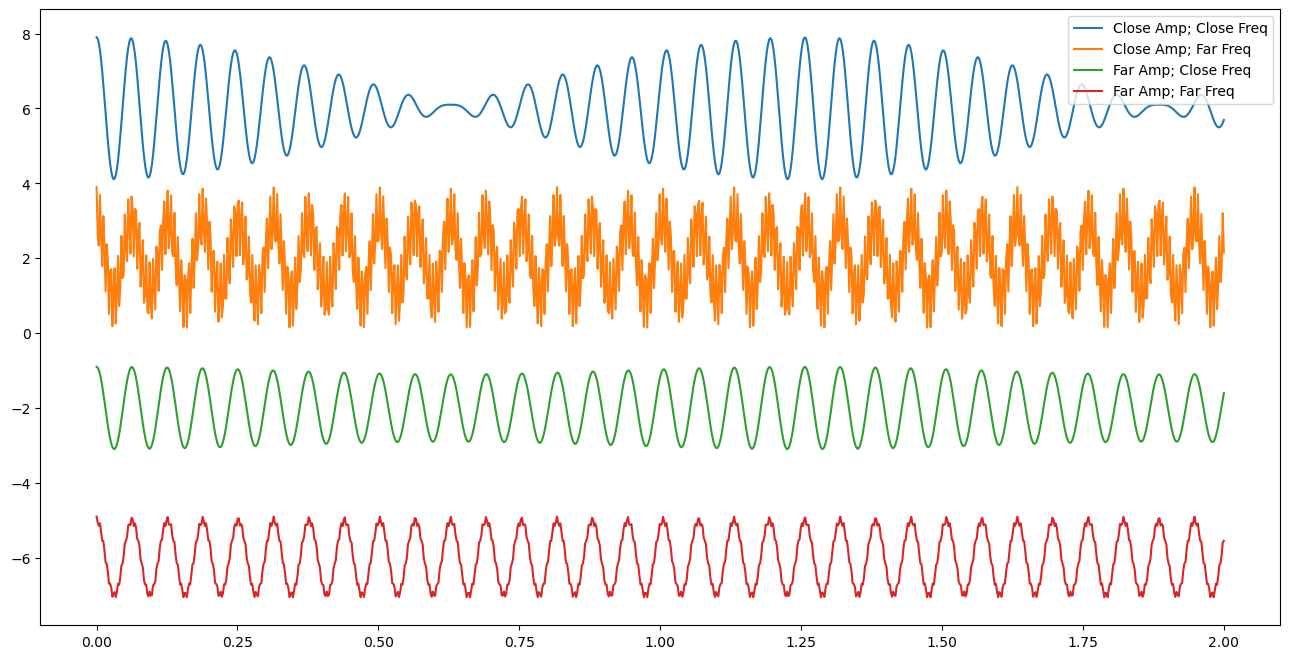

In [2]:
fig = plt.figure(figsize=(16,8))


plt.plot(t,CloseAmpCloseFreq+6, label='Close Amp; Close Freq')
plt.plot(t,CloseAmpFarFreq+2, label='Close Amp; Far Freq')
plt.plot(t,FarAmpCloseFreq-2, label='Far Amp; Close Freq')
plt.plot(t,FarAmpFarFreq-6, label='Far Amp; Far Freq')

plt.legend()

**&#9989; Do this** 

1. Adjust the signals to show qualitatively how the different signals behave as you change frequencies and amplitudes.
2. Build a table that discusses qualitatively what happens as each change is made. 

Think about the answers to the following questions:

1. Does it seem easier to see how you can deconstruct a superposed wave if the frequencies are close together or far apart?
2. What about the amplitudes? Does it matter if one is really big and one is really small? If they are comparable?

## Dealing with "Real" Signals

Ok, but can we find these frequencies given a signal? Or rather, how might we find the signal we need? We can use a little mathematics from Fourier. The [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) is a mathematical tool that allows us to deconstruct a signal into its constituent frequencies. There's an excellent introduction to it from 3Blue1Brown.

[![Fourier Transform](https://markdown-videos-api.jorgenkh.no/youtube/spUNpyF58BY?width=720&height=405)](https://inv.tux.pizza/watch?v=spUNpyF58BY)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=spUNpyF58BY](https://inv.tux.pizza/watch?v=spUNpyF58BY)
- Commercial Link: [https://youtube.com/watch?v=spUNpyF58BY](https://youtube.com/watch?v=spUNpyF58BY)

So any periodic function in 1 dimension can be expanded as a general sum of sines and cosines:

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_n sin(\omega_n t) + b_n cos(\omega_n t) \right)$$

We can show this can be written like:

$$f(t) = \sum_{-\infty}^{+\infty} c_n e^{i\omega_n t}$$

But how does this get us what we need? Our goal is to find the expansion coefficients ($a_n$'s & $b_n$'s or just the $c_n$'s), which tells us the right mix of signals to add together to get the observed one. Why is that important? Consider the signals below? How might we analyze them?

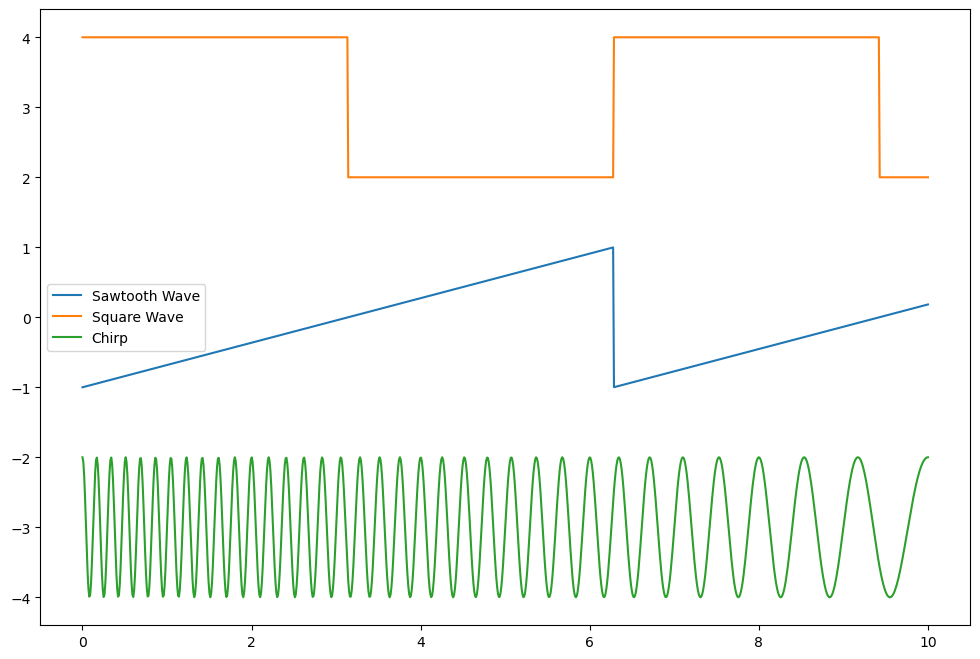

In [3]:
from scipy.signal import sawtooth, square, chirp

t = np.linspace(0,10,1000)

saw = sawtooth(t)
sq = square(t)
ch = chirp(t,6,10,1)

fig = plt.figure(figsize=(12,8))
plt.plot(t, saw, label="Sawtooth Wave")
plt.plot(t, sq+3, label='Square Wave')
plt.plot(t, ch-3, label='Chirp')
plt.legend()

## Decomposing Signals

Consider the Fourier Expansion of your choosing:

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_n \sin(\omega_n t) + b_n \cos(\omega_n t) \right) \qquad f(t) = \sum_{-\infty}^{+\infty} c_n e^{i\omega_n t}$$

In terms of the longest period, $T_0$,

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_n \sin(\dfrac{2n\pi t}{T_0}) + b_n \cos(\dfrac{2n\pi t}{T_0}) \right) \qquad f(t) = \sum_{-\infty}^{+\infty} c_n e^{i\dfrac{2n\pi t}{T_0}}$$

We can find the expansion coefficients for the following signals (think before you integrate):

1. $f(t) = \cos(\omega_0 t)$ here $\omega_0$ corresponds to the longest known period $T_0$.
2. $f(t) = 2\sin(\omega_0 t) + 3\cos(2*\omega_0t)$
3. $f(t) = 2\sin(\omega_0 t+\pi/2) + 3\cos(2*\omega_0t)$
4. $f(t) = 1$ from 0 to $T_0/2$ and 0 from $T_0/2$ to $T_0$ repeating.... 



### Pick off the coefficients

For the first two cases, we can pick off the coefficients because they match the model

$$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} \left(a_n \sin(\dfrac{2n\pi t}{T_0}) + b_n \cos(\dfrac{2n\pi t}{T_0}) \right)$$

For $f(t) = \cos(\omega_0 t)$, all the terms are zero except for $b_1$ which is 1.

For $f(t) = 2 \sin(\omega_0 t) + 3 \cos(2\omega_0 t)$, all the terms are zero except for $a_1$ which is 2 and $b_2$ which is 3.

What about the 3rd one?

$$f(t) = 2\sin(\omega_0 t+\pi/2) + 3\cos(2*\omega_0t)$$

It's clever to change this to a cosine and read off the values:

$$f(t) = 2\sin(\omega_0 t+\pi/2) + 3\cos(2*\omega_0t) = 2\cos(\omega_0 t) + 3\cos(2*\omega_0t)$$

And thus: $b_1 = 2$ and $b_2=3$ and everything else vanishes.

Can we do the integrals and get the same results? Sure. But it's a lot more work.

### What about the last one?

That function is a classic "square wave", or [half duty cycle](https://en.wikipedia.org/wiki/Duty_cycle). It's a function that is 1 for half the period and 0 for the other half. It's a function that is used in digital electronics to encode information. That function we have to solve by integrating. The handwritten notes show how. The more general duty cycle function is shown below.

![Duty cycle gif](https://upload.wikimedia.org/wikipedia/commons/0/02/PWM_duty_cycle_with_label.gif)



## Resources

### Handwritten notes

- [Introduction to Signal Analysis](../assets/notes/Notes-Fourier_Example.pdf)

### Additional Videos

[![Fourier Series](https://markdown-videos-api.jorgenkh.no/youtube/mgXSevZmjPc?width=720&height=405)](https://inv.tux.pizza/watch?v=mgXSevZmjPc)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=mgXSevZmjPc](https://inv.tux.pizza/watch?v=mgXSevZmjPc)
- Commercial Link: [https://youtube.com/watch?v=mgXSevZmjPc](https://youtube.com/watch?v=mgXSevZmjPc)